In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# 1. Create the improved model
def fe_model():
    model = tf.keras.models.Sequential([
        # First Conv Layer
        tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(48,48,1)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D(2,2),
        tf.keras.layers.Dropout(0.25),
        
        # Second Conv Layer
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D(2,2),
        tf.keras.layers.Dropout(0.25),
        
        # Third Conv Layer
        tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D(2,2),
        tf.keras.layers.Dropout(0.25),
        
        # Fourth Conv Layer
        tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D(2,2),
        tf.keras.layers.Dropout(0.25),
        
        # Classifier
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(7, activation='softmax')
    ])
    return model
    

In [3]:
# 2. Enhanced Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1/255.0,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
validation_datagen = ImageDataGenerator(rescale=1/255.0)


In [10]:
# 3. Create data generators with augmentation
train_dataset = train_datagen.flow_from_directory(
    "dataset\\CompleteDataset\\train\\", 
    target_size=(48, 48),
    batch_size=32,  # Increased batch size
    color_mode='grayscale',
    class_mode='categorical'
)
validation_dataset = validation_datagen.flow_from_directory(
    "dataset\\CompleteDataset\\validation\\",
    target_size=(48, 48),
    batch_size=32,
    color_mode='grayscale',
    class_mode='categorical'
)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [11]:
# 4. Create and compile the improved model
model = fe_model()

# Callbacks for better training
callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor='val_accuracy',
        patience=15,
        restore_best_weights=True,
        verbose=1
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.2,
        patience=10,
        min_lr=1e-7,
        verbose=1
    ),
    tf.keras.callbacks.ModelCheckpoint(
        'best_fer_model.h5',
        monitor='val_accuracy',
        save_best_only=True,
        verbose=1
    )
]

# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)


e:\Ihsan Data\Github Repos\Python\Computer Vision\facial-expression-recognition\.visionEnv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
# 5. Train the fe_model
print("Training model...")
history = model.fit(
    train_dataset,
    steps_per_epoch=len(train_dataset),  # Use all batches
    epochs=5,
    validation_data=validation_dataset,
    validation_steps=len(validation_dataset),
    callbacks=callbacks,
    verbose=1
)

Training model...


e:\Ihsan Data\Github Repos\Python\Computer Vision\facial-expression-recognition\.visionEnv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
901/901 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.1863 - loss: 2.5267
Epoch 1: val_accuracy improved from None to 0.25318, saving model to best_fer_model.h5


901/901 ━━━━━━━━━━━━━━━━━━━━ 1233s 1s/step - accuracy: 0.1995 - loss: 2.1784 - val_accuracy: 0.2532 - val_loss: 1.7756 - learning_rate: 0.0010
Epoch 2/5
901/901 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step - accuracy: 0.2357 - loss: 1.8272
Epoch 2: val_accuracy improved from 0.25318 to 0.28729, saving model to best_fer_model.h5


901/901 ━━━━━━━━━━━━━━━━━━━━ 180s 200ms/step - accuracy: 0.2419 - loss: 1.8173 - val_accuracy: 0.2873 - val_loss: 1.7302 - learning_rate: 0.0010
Epoch 3/5
901/901 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - accuracy: 0.2585 - loss: 1.7864
Epoch 3: val_accuracy improved from 0.28729 to 0.31234, saving model to best_fer_model.h5


901/901 ━━━━━━━━━━━━━━━━━━━━ 159s 177ms/step - accuracy: 0.2609 - loss: 1.7824 - val_accuracy: 0.3123 - val_loss: 1.7103 - learning_rate: 0.0010
Epoch 4/5
901/901 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step - accuracy: 0.2784 - loss: 1.7545
Epoch 4: val_accuracy did not improve from 0.31234
901/901 ━━━━━━━━━━━━━━━━━━━━ 177s 197ms/step - accuracy: 0.2839 - loss: 1.7515 - val_accuracy: 0.3122 - val_loss: 1.7213 - learning_rate: 0.0010
Epoch 5/5
901/901 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step - accuracy: 0.3024 - loss: 1.7221
Epoch 5: val_accuracy improved from 0.31234 to 0.38678, saving model to best_fer_model.h5


901/901 ━━━━━━━━━━━━━━━━━━━━ 172s 191ms/step - accuracy: 0.3082 - loss: 1.7119 - val_accuracy: 0.3868 - val_loss: 1.5630 - learning_rate: 0.0010
Restoring model weights from the end of the best epoch: 5.


In [13]:
# Save the final trained model
model.save('fer_model_final.h5')
print("Model saved as 'fer_model_final.h5'")

# Also save in the newer Keras format
model.save('fer_model_final.keras')
print("Model saved as 'fer_model_final.keras'")

# Save model architecture as JSON
model_json = model.to_json()
with open("fer_model_architecture.json", "w") as json_file:
    json_file.write(model_json)
    
# Save weights separately
model.save_weights('fer_model_weights.weights.h5')
print("Model weights saved as 'fer_model_weights.weights.h5'")

Model saved as 'fer_model_final.h5'
Model saved as 'fer_model_final.keras'
Model weights saved as 'fer_model_weights.weights.h5'


In [14]:
def load_and_test_saved_model(model_path='fer_model_final.h5', test_image_path=None):
    """
    Load saved model and test it on an image or use real-time
    """
    try:
        # Load the saved model
        print(f"Loading model from {model_path}...")
        model = tf.keras.models.load_model(model_path)
        print("✅ Model loaded successfully!")
        
        # Test on a single image if provided
        if test_image_path and os.path.exists(test_image_path):
            print(f"Testing on image: {test_image_path}")
            test_single_image(model, test_image_path)
        else:
            # Start real-time recognition
            real_time_fer_with_model(model)
            
    except Exception as e:
        print(f"❌ Error loading model: {e}")
        print("Please make sure:")
        print("1. The model file exists")
        print("2. You have trained the model first")
        print("3. All dependencies are installed")
        
def test_single_image(model, image_path):
    """
    Test the trained model on a single image
    """
    emotions = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
    
    try:
        # Load and preprocess the image
        img = cv2.imread(image_path)
        if img is None:
            print(f"Error: Could not load image from {image_path}")
            return
        
        # Convert to grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
        # Load face detector
        face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
        
        # Detect faces
        faces = face_cascade.detectMultiScale(gray, 1.3, 5)
        
        if len(faces) == 0:
            print("No faces detected in the image!")
            # Try to use the entire image as a face
            face_roi = cv2.resize(gray, (48, 48))
            face_roi = face_roi.astype('float32') / 255.0
            face_roi = np.expand_dims(face_roi, axis=-1)
            face_roi = np.expand_dims(face_roi, axis=0)
            
            # Predict
            prediction = model.predict(face_roi, verbose=0)
            predicted_class = np.argmax(prediction)
            confidence = np.max(prediction)
            emotion = emotions[predicted_class]
            
            # Display results
            plt.figure(figsize=(8, 6))
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            plt.title(f'Predicted Emotion: {emotion} (Confidence: {confidence:.2f})')
            plt.axis('off')
            plt.show()
            
            print(f"Predicted Emotion: {emotion}")
            print(f"Confidence: {confidence:.2f}")
            print("Full predictions:", dict(zip(emotions, prediction[0])))
            
        else:
            # Process each detected face
            for i, (x, y, w, h) in enumerate(faces):
                # Extract and preprocess face
                face_roi = gray[y:y+h, x:x+w]
                face_roi = cv2.resize(face_roi, (48, 48))
                face_roi = face_roi.astype('float32') / 255.0
                face_roi = np.expand_dims(face_roi, axis=-1)
                face_roi = np.expand_dims(face_roi, axis=0)
                
                # Predict
                prediction = model.predict(face_roi, verbose=0)
                predicted_class = np.argmax(prediction)
                confidence = np.max(prediction)
                emotion = emotions[predicted_class]
                
                # Draw bounding box and label on the image
                color = (0, 255, 0) if confidence > 0.5 else (0, 0, 255)
                cv2.rectangle(img, (x, y), (x+w, y+h), color, 2)
                cv2.putText(img, f"{emotion} ({confidence:.2f})", 
                           (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, color, 2)
                
                print(f"Face {i+1}: {emotion} (Confidence: {confidence:.2f})")
            
            # Display the image with predictions
            plt.figure(figsize=(10, 8))
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            plt.title('Facial Expression Recognition Results')
            plt.axis('off')
            plt.show()
            
    except Exception as e:
        print(f"Error processing image: {e}")

def real_time_fer_with_model(model):
    """
    Real-time recognition using a pre-loaded model
    """
    # Load face detector
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    
    emotions = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
    
    # Color mapping for different emotions
    emotion_colors = {
        'angry': (0, 0, 255),      # Red
        'disgust': (0, 128, 0),    # Dark Green
        'fear': (128, 0, 128),     # Purple
        'happy': (0, 255, 255),    # Yellow
        'neutral': (255, 255, 255), # White
        'sad': (255, 0, 0),        # Blue
        'surprise': (0, 165, 255)  # Orange
    }
    
    cam = cv2.VideoCapture(0)
    
    if not cam.isOpened():
        print("Error: Could not open camera")
        return
    
    print("\nReal-time Facial Expression Recognition (Using Saved Model)")
    print("Press 'q' to exit")
    
    while True:
        ret, frame = cam.read()
        if not ret:
            break
            
        frame = cv2.flip(frame, 1)
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.3, 5, minSize=(100, 100))
        
        for (x, y, w, h) in faces:
            try:
                face_roi = gray[y:y+h, x:x+w]
                face_roi = cv2.resize(face_roi, (48, 48))
                face_roi = face_roi.astype('float32') / 255.0
                face_roi = np.expand_dims(face_roi, axis=-1)
                face_roi = np.expand_dims(face_roi, axis=0)
                
                prediction = model.predict(face_roi, verbose=0)
                predicted_class = np.argmax(prediction)
                confidence = np.max(prediction)
                emotion = emotions[predicted_class]
                color = emotion_colors[emotion]
                
                # Draw bounding box and label
                cv2.rectangle(frame, (x, y), (x+w, y+h), color, 3)
                label_bg_height = 40
                cv2.rectangle(frame, (x, y-label_bg_height), (x+w, y), color, -1)
                cv2.putText(frame, f"{emotion} ({confidence:.2f})", 
                           (x+5, y-15), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 0), 2)
                
            except Exception as e:
                continue
        
        cv2.putText(frame, "Press 'q' to exit", (10, 30), 
                   cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)
        cv2.putText(frame, f"Faces: {len(faces)}", (10, 60), 
                   cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)
        
        cv2.imshow('Facial Expression Recognition - Saved Model', frame)
        
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    
    cam.release()
    cv2.destroyAllWindows()

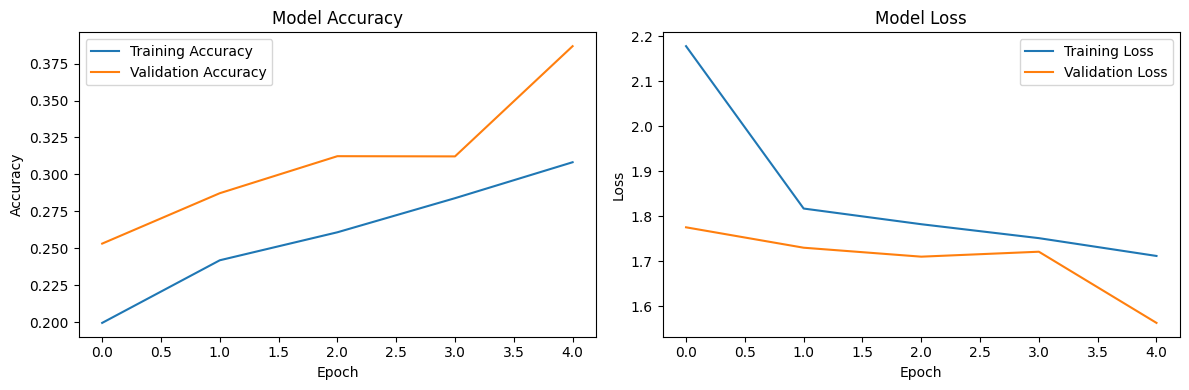

In [15]:
# 7. Plot training history
def plot_training_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    # Accuracy plot
    ax1.plot(history.history['accuracy'], label='Training Accuracy')
    ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax1.set_title('Model Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend()
    
    # Loss plot
    ax2.plot(history.history['loss'], label='Training Loss')
    ax2.plot(history.history['val_loss'], label='Validation Loss')
    ax2.set_title('Model Loss')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()
    
    plt.tight_layout()
    plt.show()

# Plot the training history
plot_training_history(history)

Model Evaluation:
221/221 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step
Classification Report:
              precision    recall  f1-score   support

       angry       0.11      0.02      0.03       960
     disgust       0.00      0.00      0.00       111
        fear       0.10      0.01      0.02      1018
       happy       0.26      0.40      0.32      1825
     neutral       0.18      0.15      0.16      1216
         sad       0.16      0.31      0.21      1139
    surprise       0.10      0.09      0.09       797

    accuracy                           0.19      7066
   macro avg       0.13      0.14      0.12      7066
weighted avg       0.16      0.19      0.16      7066



e:\Ihsan Data\Github Repos\Python\Computer Vision\facial-expression-recognition\.visionEnv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
e:\Ihsan Data\Github Repos\Python\Computer Vision\facial-expression-recognition\.visionEnv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
e:\Ihsan Data\Github Repos\Python\Computer Vision\facial-expression-recognition\.visionEnv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 

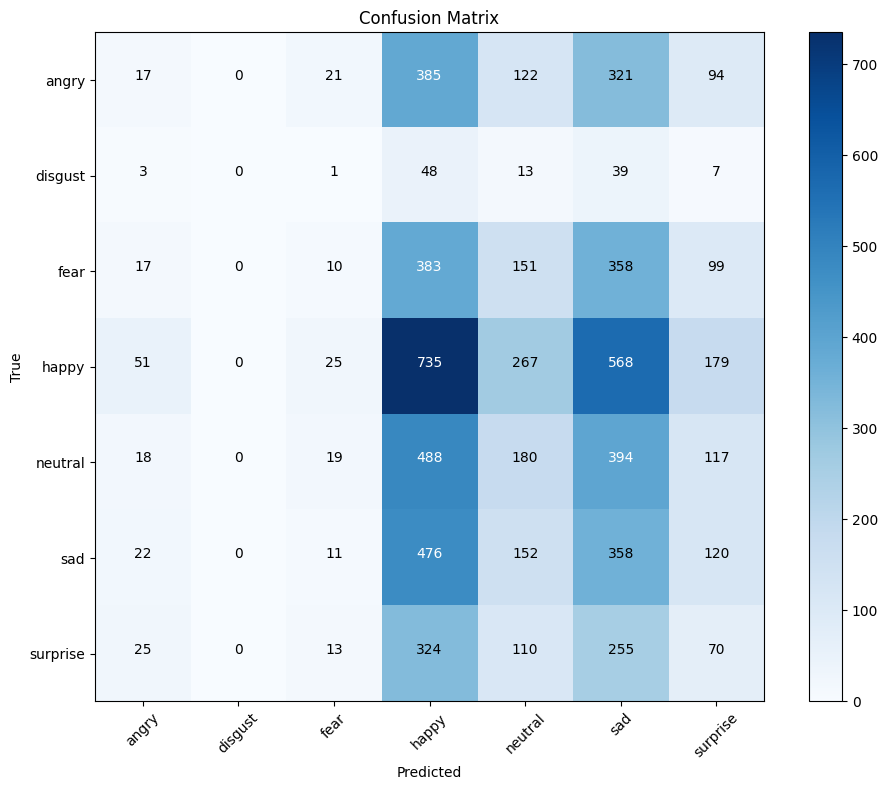

In [17]:
# 8. Evaluate the model
def evaluate_model(model, validation_dataset):
    # Get predictions
    predictions = model.predict(validation_dataset)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = validation_dataset.classes
    
    # Classification report
    from sklearn.metrics import classification_report, confusion_matrix
    print("Classification Report:")
    print(classification_report(true_classes, predicted_classes, 
                              target_names=list(validation_dataset.class_indices.keys())))
    
    # Confusion matrix
    cm = confusion_matrix(true_classes, predicted_classes)
    plt.figure(figsize=(10, 8))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(validation_dataset.class_indices))
    plt.xticks(tick_marks, validation_dataset.class_indices.keys(), rotation=45)
    plt.yticks(tick_marks, validation_dataset.class_indices.keys())
    plt.xlabel('Predicted')
    plt.ylabel('True')
    
    # Add text annotations
    thresh = cm.max() / 2.
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, format(cm[i, j], 'd'),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.show()

# Evaluate the model
print("Model Evaluation:")
evaluate_model(model, validation_dataset)

In [18]:
# A quick test of the model
def quick_test():
    """Quick test to verify everything works"""
    try:
        model = tf.keras.models.load_model('fer_model_final.h5')
        print("✅ Model loaded successfully!")
        print("Starting real-time recognition...")
        real_time_fer_with_model(model)
    except:
        print("❌ Model not found. Please train the model first.")

# Run this anytime to test
quick_test()

✅ Model loaded successfully!
Starting real-time recognition...

Real-time Facial Expression Recognition (Using Saved Model)
Press 'q' to exit
